## Hough Space to Integer Mapping

In [93]:
#import necessary libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections

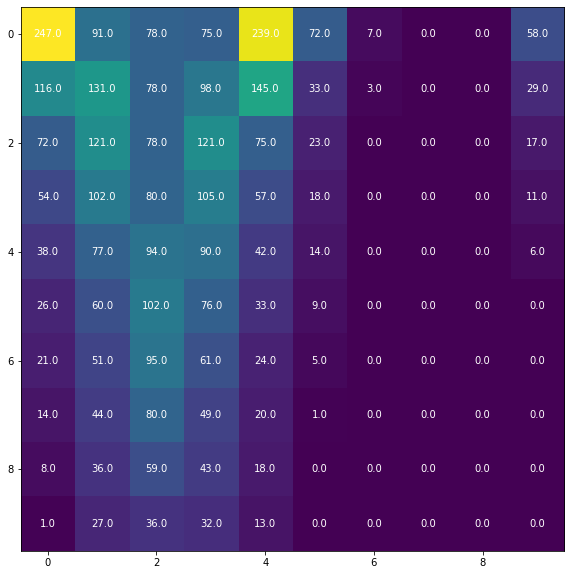

In [94]:
hough_space = np.array([[247., 116.,  72.,  54.,  38.,  26.,  21.,  14.,   8.,   1.],
               [ 91., 131., 121., 102.,  77.,  60.,  51.,  44.,  36.,  27.],
               [ 78.,  78.,  78.,  80.,  94., 102.,  95.,  80.,  59.,  36.],
               [ 75.,  98., 121., 105.,  90.,  76.,  61.,  49.,  43.,  32.],
               [239., 145.,  75.,  57.,  42.,  33.,  24.,  20.,  18.,  13.],
               [ 72.,  33.,  23.,  18.,  14.,   9.,   5.,   1.,   0.,   0.],
               [  7.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
               [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
               [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
               [ 58.,  29.,  17.,  11.,   6.,   0.,   0.,   0.,   0.,   0.]]).T

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(hough_space)

# Loop over data dimensions and create text annotations.
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, hough_space[i, j], ha="center", va="center", color="w")

Frequency of unique values:
[[  0.   1.   3.   5.   6.   7.   8.   9.  11.  13.  14.  17.  18.  20.
   21.  23.  24.  26.  27.  29.  32.  33.  36.  38.  42.  43.  44.  49.
   51.  54.  57.  58.  59.  60.  61.  72.  75.  76.  77.  78.  80.  90.
   91.  94.  95.  98. 102. 105. 116. 121. 131. 145. 239. 247.]
 [ 35.   2.   1.   1.   1.   1.   1.   1.   1.   1.   2.   1.   2.   1.
    1.   1.   1.   1.   1.   1.   1.   2.   2.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   1.   2.   2.   1.   1.   3.   2.   1.
    1.   1.   1.   1.   2.   1.   1.   2.   1.   1.   1.   1.]]


<BarContainer object of 54 artists>

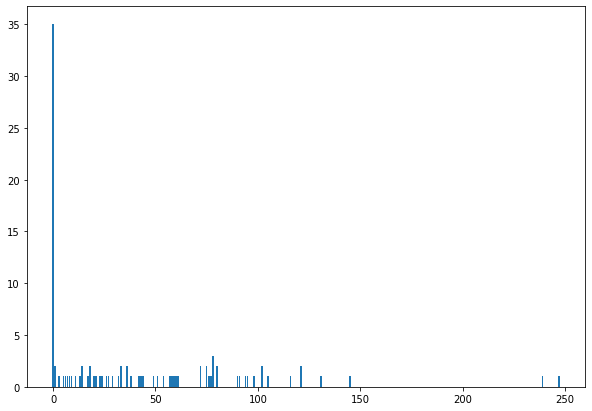

In [95]:
# Find the number of unique elements and find the distribution
unique_elements, counts_elements = np.unique(hough_space, return_counts=True)
print("Frequency of unique values:")
print(np.asarray((unique_elements, counts_elements)))
plt.figure(figsize=(10,7))
plt.bar(unique_elements, counts_elements)

In [96]:
new_h = [] # new h_matrix
# Filter out the low and common values
for i in range(10):
    for j in range(10):
        if (hough_space[i,j] >= 80):
            new_h.append(hough_space[i,j])

print(new_h)
common_elements = [item for item, count in collections.Counter(new_h).items() if count > 1]
print(common_elements)

[247.0, 91.0, 239.0, 116.0, 131.0, 98.0, 145.0, 121.0, 121.0, 102.0, 80.0, 105.0, 94.0, 90.0, 102.0, 95.0, 80.0]
[121.0, 102.0, 80.0]


In [97]:
# Remove Duplicates
count = 0
iter = 1
for l in range(len(common_elements)):
    for k in range(len(new_h)):
        if (new_h[k]==common_elements[l] and count==0):
            count = count + 1
        elif (new_h[k]==common_elements[l] and count>=1):
            new_h[k] = new_h[k] + iter
            iter = iter + 1
    count = 0
    iter = 1
    
print(new_h) # new list with duplicates removed

#Glitch: New iter updated values can be common with already existing values.

[247.0, 91.0, 239.0, 116.0, 131.0, 98.0, 145.0, 121.0, 122.0, 102.0, 80.0, 105.0, 94.0, 90.0, 103.0, 95.0, 81.0]


No Duplicates Found.
[247, 91, 239, 116, 131, 98, 145, 121, 122, 102, 80, 105, 94, 90, 103, 95, 81]


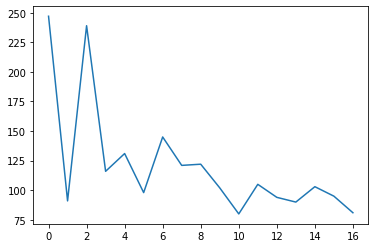

In [102]:
#Recheck for duplicates.
common_elements = [item for item, count in collections.Counter(new_h).items() if count > 1]
if common_elements==[]:
    print('No Duplicates Found.')

#Map to integers
int_new_h = [int(i) for i in new_h]
print(int_new_h)
plt.plot(range(len(int_new_h)),int_new_h,)

## What's Wrong?

- Duplicate Glitch: New iter updated values can be common with already existing values. Fix this.
- How to remap the results to labels i.e. set of hit coordinates???? Store indices of the vote counts?